In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings("ignore")
# import Beautifulsoup as bs4



# Data extraction with coinmarketcap API

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '352ce757-****-40be-9eb7-*******',
}

session = Session()
session.headers.update(headers)

# print(f"Status code: {response.status_code}")
# print(f"Response Text: {response.text}")

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-03-19T05:01:33.285Z', 'error_code': 0, 'error_message': None, 'elapsed': 361, 'credit_count': 25, 'notice': None, 'total_count': 10534}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11981, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'p

In [4]:
type(data)

dict

In [5]:
stock_df = pd.json_normalize(data["data"])

In [6]:
stock_df.to_csv("stock2_data.csv", index=False)

# Analyzing Cryptocurrency Trends Data

In [7]:
%matplotlib inline

In [9]:
crypto_df = pd.read_csv("stock2_data.csv")

## Data Wrangling and Cleaning

Basic info = id, name, symbol, slug, date_added

Market Data = num_market_pairs, cmc_rank, tags

Supply info = max_supply, circulating_supply, total_supply, infinite_supply

Market Performance = quote.USD.price, quote.USD.volume_24h, quote.USD.market_cap

Price Changes = quote.USD.percent_change_1h, quote.USD.percent_change_24h, quote.USD.percent_change_7d, quote.USD.percent_change_30d, quote.USD.percent_change_60d, quote.USD.percent_change_90d

Market Cap & TVL = quote.USD.market_cap_dominance, quote.USD.fully_diluted_market_cap, quote.USD.tvl_ratio, quote.USD.tvl

Platform Details = platform.id, platform.name, platform.symbol, platform.slug, platform.token_address

In [10]:
pd.set_option("display.max_columns", 40)
pd.set_option("display.max_rows", None)

In [11]:
crypto_df.head(10)

id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             11981   
1  1027     Ethereum    ETH  ethereum             10055   
2   825  Tether USDt   USDT    tether            120000   
3    52          XRP    XRP       xrp              1552   
4  1839          BNB    BNB       bnb              2391   
5  5426       Solana    SOL    solana               852   
6  3408         USDC   USDC  usd-coin             26311   
7    74     Dogecoin   DOGE  dogecoin              1176   
8  2010      Cardano    ADA   cardano              1478   
9  1958         TRON    TRX      tron              1131   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2013-08-04T00:00:00.000Z   
4  2017-07-25T00:00:00.000Z   
5  2020-04-10T00:00:00.000Z   
6  2018-10-08T00:00:00.000Z   
7  2013-12-15T00:00:00.000Z   
8  2017-10-01T00:00:00.000Z   
9  2017-09-13T00:00:00.000Z   

                                                tags    max_supply  \
0  ['mineable', 'pow', 'sha-256', 'store-of-value...  2.100000e+07   
1  ['pos', 'smart-contracts', 'ethereum-ecosystem...           NaN   
2  ['stablecoin', 'asset-backed-stablecoin', 'wav...           NaN   
3  ['medium-of-exchange', 'enterprise-solutions',...  1.000000e+11   
4  ['marketplace', 'centralized-exchange', 'payme...           NaN   
5  ['pos', 'platform', 'solana-ecosystem', 'cms-h...           NaN   
6  ['medium-of-exchange', 'stablecoin', 'asset-ba...           NaN   
7  ['mineable', 'pow', 'scrypt', 'medium-of-excha...           NaN   
8  ['dpos', 'pos', 'platform', 'research', 'smart...  4.500000e+10   
9  ['media', 'payments', 'tron-ecosystem', 'layer...           NaN   

   circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0        1.983883e+07  1.983883e+07            False       NaN         1   
1        1.206267e+08  1.206267e+08             True       NaN         2   
2        1.434391e+11  1.448819e+11             True       NaN         3   
3        5.810892e+10  9.998634e+10            False       NaN         4   
4        1.424742e+08  1.424742e+08            False       NaN         5   
5        5.100338e+08  5.964889e+08             True       NaN         6   
6        5.877264e+10  5.877264e+10            False       NaN         7   
7        1.484883e+11  1.484883e+11             True       NaN         8   
8        3.523480e+10  4.499494e+10            False       NaN         9   
9        9.502016e+10  9.502017e+10             True       NaN        10   

   self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                               NaN                       NaN        NaN   
1                               NaN                       NaN        NaN   
2                               NaN                       NaN        NaN   
3                               NaN                       NaN        NaN   
4                               NaN                       NaN        NaN   
5                               NaN                       NaN        NaN   
6                               NaN                       NaN        NaN   
7                               NaN                       NaN        NaN   
8                               NaN                       NaN        NaN   
9                               NaN                       NaN        NaN   

               last_updated  quote.USD.price  quote.USD.volume_24h  \
0  2025-03-19T04:59:00.000Z     82957.086695          2.441122e+10   
1  2025-03-19T04:59:00.000Z      1932.947478          1.068146e+10   
2  2025-03-19T04:59:00.000Z         0.999963          5.567227e+10   
3  2025-03-19T04:59:00.000Z         2.293016          3.181428e+09   
4  2025-03-19T04:59:00.000Z       617.769418          2.103641e+09   
5  2025-03-19T04:59:00.000Z       125.984863          2.159540e+09   
6  2025-03-19T04:59:00.000Z         0.999997          7.389352e+09   
7  2025-

In [12]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  5000 non-null   int64  
 1   name                                5000 non-null   object 
 2   symbol                              5000 non-null   object 
 3   slug                                5000 non-null   object 
 4   num_market_pairs                    5000 non-null   int64  
 5   date_added                          5000 non-null   object 
 6   tags                                5000 non-null   object 
 7   max_supply                          3183 non-null   float64
 8   circulating_supply                  5000 non-null   float64
 9   total_supply                        5000 non-null   float64
 10  infinite_supply                     5000 non-null   bool   
 11  platform                            0 non-n

In [ ]:
# Drop columns with null values values
# This reduced the number of columns from 36 to 26
# crypto_df.drop(["platform", "tvl_ratio", "self_reported_market_cap"], axis=1, inplace=True)


In [14]:
crypto_df.drop(["platform","tvl_ratio"], axis=1, inplace=True)

In [15]:
crypto_df.drop(["max_supply","self_reported_circulating_supply","self_reported_market_cap"], axis=1, inplace=True)

In [68]:
# crypto_df.drop(["platform.token_address","platform.slug","quote.USD.tvl"], axis=1, inplace=True)

In [84]:
crypto_df.drop(["platform.id","platform.name","platform.symbol"], axis=1, inplace=True)

In [85]:
# Converting date to real date

crypto_df['date_added'] = pd.to_datetime(crypto_df['date_added']) 
crypto_df["last_updated"] = pd.to_datetime(crypto_df["last_updated"])
crypto_df["quote.USD.last_updated"] = pd.to_datetime(crypto_df["quote.USD.last_updated"])

In [86]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 29912
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   name                                5000 non-null   object             
 1   symbol                              5000 non-null   object             
 2   slug                                5000 non-null   object             
 3   num_market_pairs                    5000 non-null   int64              
 4   date_added                          5000 non-null   datetime64[ns, UTC]
 5   tags                                5000 non-null   object             
 6   circulating_supply                  5000 non-null   float64            
 7   total_supply                        5000 non-null   float64            
 8   infinite_supply                     5000 non-null   bool               
 9   cmc_rank                            5000 non-

### Columnheaders breakdown
date_added = The date the cryptocurrency was first listed on the platform

num_market_pairs = The number of trading pairs available for the cryptocurrency across different exchanges.

cmc_rank = The rank of the cryptocurrency based on the market capitalization

tags = A list of keywords or categories related to the cryptocurrency

max_supply = The maximum number of tokens that will ever exist.(e.g. Bitcoin has 21 mill max supply)

circulating_supply = The number of tokens currently available and actively trading

total_supply = The total number of tokens created (excluding burns or locked tokens)

infinite_supply = Whether the coin has unlimited supply

price_usd = The current price of the cryptocurrency in USD

volume_24h = The total volume of the cryptocurrency traded in the last 24 hours

market_cap_usd = The total market value of all circulating tokens (price * circulating supply)



In [87]:
# Renamed columns

# crypto_df.columns = [col.split(".")[1] for col in crypto_df.columns]
# crypto_df.columns
# crypto_df.columns = ['id', 'name','symbol','slug', 'date_added', 'num_market_pairs', 'cmc_rank', 'tags', 'max_supply', 'circulating_supply', 'total_supply', 'infinite_supply', 'price_usd', 'volume_24h', 'market_cap_usd', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d', 'percent_change_30d', 'percent_change_60d', 'percent_change_90d', 'market_cap_dominance', 'fully_diluted_market_cap', 'tvl_ratio', 'tvl']

# crypto_df.columns

In [88]:
crypto_df.columns

Index(['name', 'symbol', 'slug', 'num_market_pairs', 'date_added', 'tags',
       'circulating_supply', 'total_supply', 'infinite_supply', 'cmc_rank',
       'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.last_updated', 'volatility', 'market_cap_class'],
      dtype='object')

In [89]:

crypto_df.isnull().sum()
# We now have no missing values

name                                  0
symbol                                0
slug                                  0
num_market_pairs                      0
date_added                            0
tags                                  0
circulating_supply                    0
total_supply                          0
infinite_supply                       0
cmc_rank                              0
last_updated                          0
quote.USD.price                       0
quote.USD.volume_24h                  0
quote.USD.volume_change_24h           0
quote.USD.percent_change_1h           0
quote.USD.percent_change_24h          0
quote.USD.percent_change_7d           0
quote.USD.percent_change_30d          0
quote.USD.percent_change_60d          0
quote.USD.percent_change_90d          0
quote.USD.market_cap                  0
quote.USD.market_cap_dominance        0
quote.USD.fully_diluted_market_cap    0
quote.USD.last_updated                0
volatility                            0


In [103]:
crypto_df.shape

(5000, 26)

In [105]:
crypto_df.head()

name symbol      slug  num_market_pairs  \
id                                                     
1         Bitcoin    BTC   bitcoin             11981   
1027     Ethereum    ETH  ethereum             10055   
825   Tether USDt   USDT    tether            120000   
52            XRP    XRP       xrp              1552   
1839          BNB    BNB       bnb              2391   

                    date_added  \
id                               
1    2010-07-13 00:00:00+00:00   
1027 2015-08-07 00:00:00+00:00   
825  2015-02-25 00:00:00+00:00   
52   2013-08-04 00:00:00+00:00   
1839 2017-07-25 00:00:00+00:00   

                                                   tags  circulating_supply  \
id                                                                            
1     ['mineable', 'pow', 'sha-256', 'store-of-value...        1.983883e+07   
1027  ['pos', 'smart-contracts', 'ethereum-ecosystem...        1.206267e+08   
825   ['stablecoin', 'asset-backed-stablecoin', 'wav...        1.434391e+11   
52    ['medium-of-exchange', 'enterprise-solutions',...        5.810892e+10   
1839  ['marketplace', 'centralized-exchange', 'payme...        1.424742e+08   

      total_supply  infinite_supply  cmc_rank              last_updated  \
id                                                                        
1     1.983883e+07            False         1 2025-03-19 04:59:00+00:00   
1027  1.206267e+08             True         2 2025-03-19 04:59:00+00:00   
825   1.448819e+11             True         3 2025-03-19 04:59:00+00:00   
52    9.998634e+10            False         4 2025-03-19 04:59:00+00:00   
1839  1.424742e+08            False         5 2025-03-19 04:59:00+00:00   

      quote.USD.price  quote.USD.volume_24h  quote.USD.volume_change_24h  \
id                                                                         
1        82957.086695          2.441122e+10                       1.6347   
1027      1932.947478          1.068146e+10                       8.9571   
825          0.999963          5.567227e+10                      -1.2211   
52           2.293016          3.181428e+09                      -9.2732   
1839       617.769418          2.103641e+09                     -10.9411   

      quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
id                                                                
1                       -0.116585                     -0.010259   
1027                    -0.279636                      1.564173   
825                      0.004874                      0.007858   
52                      -0.007921                      0.506187   
1839                    -0.155172                     -2.065155   

      quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
id                                                                
1                        1.476235                    -13.633174   
1027                     3.606353                    -27.404260   
825                      0.042786                     -0.021278   
52                       6.284276                    -15.211282   
1839                    12.776992                     -7.830544   

      quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
id                                                                 
1                       -19.882892                    -17.553957   
1027                    -42.545772                    -47.071319   
825                       0.029892                      0.047764   
52                      -28.392975                     -2.148903   
1839                    -12.510435                    -11.476351   

      quote.USD.market_cap  quote.USD.market_cap_dominance  \
id                                                           
1             1.645772e+12                         60.5729   
1027          2.331651e+11                          8.5817   
825           1.434337e+11                          5.2791   
52            1.332447e+11               

# Analysis and Insights

In [ ]:

crypto_df.describe()


num_market_pairs  circulating_supply  total_supply     cmc_rank  \
count       5000.000000        5.000000e+03  5.000000e+03  5000.000000   
mean          79.590400        2.307491e+19  3.696714e+19  2500.500000   
std         1758.049705        1.631597e+21  2.612599e+21  1443.520003   
min            1.000000        0.000000e+00  0.000000e+00     1.000000   
25%            6.000000        0.000000e+00  1.000000e+08  1250.750000   
50%           14.000000        4.604179e+07  9.999969e+08  2500.500000   
75%           34.000000        8.501783e+08  3.366614e+09  3750.250000   
max       120000.000000        1.153714e+23  1.847387e+23  5000.000000   

       quote.USD.price  quote.USD.volume_24h  quote.USD.volume_change_24h  \
count     5.000000e+03          5.000000e+03                 5.000000e+03   
mean      8.485495e+03          2.798130e+07                 2.595126e+05   
std       5.865343e+05          8.835637e+08                 1.829561e+07   
min       2.573415e-17          0.000000e+00                -1.000000e+02   
25%       3.875113e-04          1.439295e+04                -1.379780e+01   
50%       4.945427e-03          1.005954e+05                 0.000000e+00   
75%       7.670511e-02          7.382690e+05                 1.475873e+01   
max       4.146995e+07          5.567227e+10                 1.293693e+09   

       quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
count                  5000.000000                   5000.000000   
mean                     -0.012482                      5.765600   
std                       2.986316                    237.626372   
min                     -65.308227                    -99.528298   
25%                      -0.234797                     -2.491455   
50%                       0.000000                     -0.000665   
75%                       0.167058                      1.810558   
max                      78.643588                  16597.698732   

       quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
count                 5.000000e+03                  5.000000e+03   
mean                  1.263598e+03                  2.968171e+06   
std                   8.706512e+04                  2.092039e+08   
min                  -9.962584e+01                 -9.999916e+01   
25%                  -3.772181e+00                 -4.004160e+01   
50%                   1.461499e+00                 -2.467288e+01   
75%                   1.040015e+01                 -7.159275e+00   
max                   6.155639e+06                  1.479292e+10   

       quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
count                  5.000000e+03                  5.000000e+03   
mean                   2.287760e+07                  2.714453e+06   
std                    1.601883e+09                  1.766817e+08   
min                   -9.999996e+01                 -1.000000e+02   
25%                   -6.707879e+01                 -7.400757e+01   
50%                   -4.921567e+01                 -5.571417e+01   
75%                   -2.511288e+01                 -2.981395e+01   
max                    1.132652e+11                  1.244570e+10   

       quote.USD.market_cap  quote.USD.market_cap_dominance  \
count          5.000000e+03                     5000.000000   
mean           5.497985e+08                        0.019998   
std            2.374241e+10                        0.873847   
min            0.000000e+00                        0.000000   
25%            0.000000e+00                        0.000000   
50%            2.098164e+05                        0.000000   
75%            5.221078e+06                        0.000000   
max            1.645772e+12                       60.572900   

       quote.USD.fully_diluted_market_cap    volatility  
count                        5.000000e+03  5.000000e+03  
mean                         5.877785e+20  1.484002e+06  
std                          4.156221e+22  1.046019e+08 

In [115]:
# Ranking cryptos based on percentage change

crypto_df_sorted = crypto_df.sort_values(by=["quote.USD.percent_change_7d"], ascending=False)
crypto_df_sorted[["name", "symbol", "quote.USD.percent_change_7d","quote.USD.percent_change_24h"]].head(15)



name  symbol  quote.USD.percent_change_7d  \
id                                                                       
2502                  Huobi Token      HT                 6.155639e+06   
33114           Saitama Wolf Pack     SWP                 9.862151e+04   
32486                         NOT     CAT                 2.057872e+04   
28750                        TOAD    TOAD                 3.307443e+03   
35892                    Tutorial     TUT                 2.783652e+03   
4298                       Rapidz    RPZX                 2.069350e+03   
20158                       Amino   AMINO                 1.139619e+03   
33368  TRUMP MEME (trumpmeme.net)    MEME                 1.098296e+03   
33471                   SORA GROK    GROK                 1.045046e+03   
293                  Bitcoin Plus     XBC                 1.003856e+03   
32751   TRUMP MAGA (trumpmaga.me)    MAGA                 7.679560e+02   
33521                   PEPE MAGA    MAGA                 7.493841e+02   
32488               GameStop Coin     GME                 7.193595e+02   
32483                   BSC Layer     BSC                 6.038994e+02   
3718                   BitTorrent  BTTOLD                 5.500990e+02   

       quote.USD.percent_change_24h  
id                                   
2502                       8.812241  
33114                     -2.200684  
32486                    341.413549  
28750                    481.624533  
35892                     59.046648  
4298                      -1.565860  
20158                   1295.483638  
33368                    151.764142  
33471                    409.842879  
293                        0.000000  
32751                    356.885478  
33521                    419.908432  
32488                    413.515442  
32483                    232.544448  
3718                     100.369526

In [125]:
crypto_df_sorted[["name", "symbol", "quote.USD.percent_change_7d","quote.USD.percent_change_24h"]].tail(15)

name  symbol  quote.USD.percent_change_7d  \
id                                                                   
34864             Avery Games   AVERY                   -98.527249   
33989   Matrix Layer Protocol     MLP                   155.564346   
2090                  LATOKEN      LA                    -4.274371   
5957                DFI.Money    YFII                    11.630171   
8679                 Unido EP     UDO                   -18.060643   
15810          OMNIA Protocol   OMNIA                   -15.958235   
33561             trumpwifhat   TRUMP                   414.686649   
8384                      CLV     CLV                   -15.457767   
36059                   Shrek   SHREK                   -77.714802   
34954                 WYscale     WYS                   -39.612480   
35344                 Forkast     CGX                   -13.371798   
32483               BSC Layer     BSC                   603.899449   
33946  Nugget Trap Gold Token  NGTG$$                   -24.652037   
36062           Build forward      BF                   -66.676386   
5453              KardiaChain     KAI                    33.821204   

       quote.USD.percent_change_24h  
id                                   
34864                    -32.671984  
33989                      3.419372  
2090                     -10.213539  
5957                      15.691085  
8679                      10.843803  
15810                     -0.545015  
33561                    387.893421  
8384                       2.228585  
36059                    -77.714802  
34954                     20.211862  
35344                    -22.389156  
32483                    232.544448  
33946                     -2.221871  
36062                    -66.676386  
5453                       0.724792

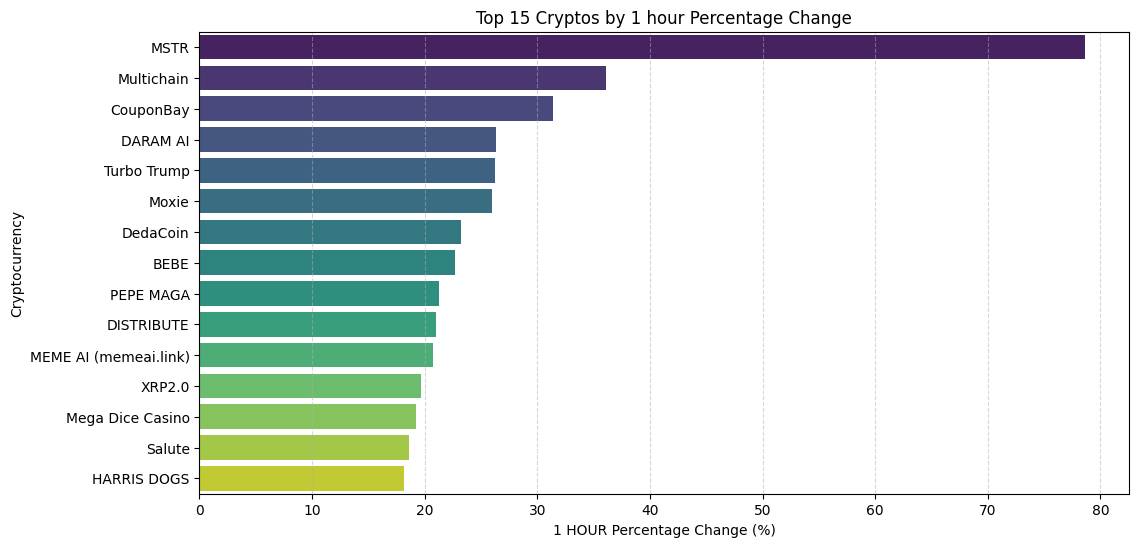

In [ ]:

# Visualization of the top 15 cryptocurrencies ranked by their 1 hour percentage change
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by 1 hour percentage change (descending order)
crypto_df_sorted = crypto_df.sort_values(by=["quote.USD.percent_change_1h"], ascending=False)

# Select top 15
top_15_cryptos = crypto_df_sorted.head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_15_cryptos,
    x="quote.USD.percent_change_1h",
    y="name",
    palette="viridis"
)

# Labels and Title
plt.xlabel("1 HOUR Percentage Change (%)")
plt.ylabel("Cryptocurrency")
plt.title("Top 15 Cryptos by 1 hour Percentage Change")
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show plot
plt.show()


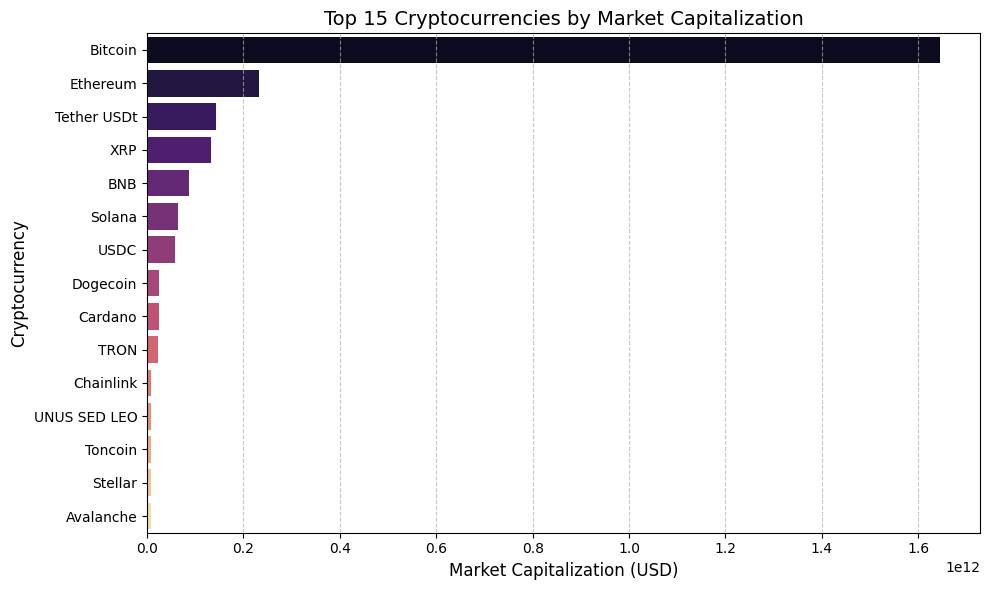

In [141]:

# Sort cryptocurrencies by Market Cap in descending order
crypto_df_sorted = crypto_df.sort_values(by=["quote.USD.market_cap"], ascending=False)

# Select top 15 currencies
top_15_cryptos = crypto_df_sorted.head(15)

# Set up figure
plt.figure(figsize=(10, 6))

# Custom color palette for bars
colors = sns.color_palette("magma", len(top_15_cryptos))

# Create a horizontal bar plot
sns.barplot(
    data=top_15_cryptos,
    x="quote.USD.market_cap",
    y="name",
    palette=colors
)

# Add Title & Labels
plt.title("Top 15 Cryptocurrencies by Market Capitalization", fontsize=14)
plt.xlabel("Market Capitalization (USD)", fontsize=12)
plt.ylabel("Cryptocurrency", fontsize=12)

# Add grid lines
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Improve spacing
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


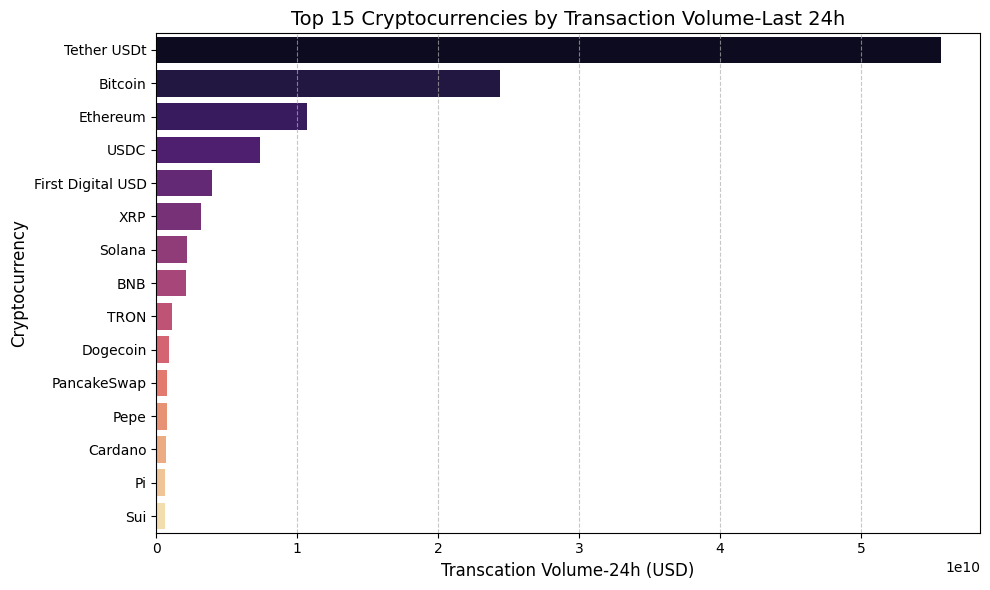

In [139]:
# Top 15 currencies by transaction volume in descending order
crypto_df_sorted_volume = crypto_df.sort_values(by=["quote.USD.volume_24h"], ascending=False)

# Select top 15 currencies
top_15_cryptos_volume = crypto_df_sorted_volume.head(15)

# Set up figure
plt.figure(figsize=(10, 6))

# Custom color palette for bars
colors = sns.color_palette("magma", len(top_15_cryptos_volume))

# Create a horizontal bar plot
sns.barplot(
    data=top_15_cryptos_volume,
    x="quote.USD.volume_24h",
    y="name",
    palette=colors
)

# Add Title & Labels
plt.title("Top 15 Cryptocurrencies by Transaction Volume-Last 24h", fontsize=14)
plt.xlabel("Transcation Volume-24h (USD)", fontsize=12)
plt.ylabel("Cryptocurrency", fontsize=12)

# Add grid lines
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Improve spacing
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()

In [156]:
crypto_df.columns

Index(['name', 'symbol', 'slug', 'num_market_pairs', 'date_added', 'tags',
       'circulating_supply', 'total_supply', 'infinite_supply', 'cmc_rank',
       'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.last_updated', 'volatility', 'market_cap_class'],
      dtype='object')

### Volatility in cryptocurrencies
The cryptocurrencies market has been spectaclualry volatile since the first exchange. Let's begins by selecting and plotting the 24 hours and 7 days % change

In [155]:
# Finding the most volatile cryptos be checking standard deviation of price movements
# A volatile coin is a currency that experiences large and unpredictable price swings over short periods. Can rise and drop 10%-50% or more in a single day due to market demand, news, or speculation.

crypto_df['volatility'] = crypto_df[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d']].std(axis=1)

crypto_df.sort_values(by="volatility", ascending=False).head(5)  # Most volatile coins


name     symbol              slug  num_market_pairs  \
id                                                                         
32733  Baby Neiro (ERC20)  BABYNEIRO  baby-neiro-erc20                 4   
29579              Cavada     CAVADA            cavada                 3   
2502          Huobi Token         HT         htx-token               136   
32044               Michi      MICHI         michi-bsc                24   
32079                MAGA     PEOPLE  maga-peopletoken                 2   

                     date_added  \
id                                
32733 2024-08-19 11:02:25+00:00   
29579 2025-03-04 02:58:44+00:00   
2502  2018-02-03 00:00:00+00:00   
32044 2024-06-28 13:48:09+00:00   
32079 2024-07-03 11:27:43+00:00   

                                                    tags  circulating_supply  \
id                                                                             
32733                    ['memes', 'ethereum-ecosystem']                 0.0   
29579  ['ethereum-ecosystem', 'binance-chain', 'bnb-c...                 0.0   
2502   ['marketplace', 'centralized-exchange', 'disco...                 0.0   
32044  ['memes', 'binance-smart-chain', 'bnb-chain-ec...                 0.0   
32079  ['binance-smart-chain', 'bnb-chain-ecosystem',...                 0.0   

       total_supply  infinite_supply  cmc_rank              last_updated  \
id                                                                         
32733  4.206900e+14            False      4723 2025-03-19 04:59:00+00:00   
29579  9.000000e+09            False      4832 2025-03-19 04:59:00+00:00   
2502   2.039804e+08            False      3764 2025-03-19 04:59:00+00:00   
32044  1.000000e+11            False      3394 2025-03-19 04:59:00+00:00   
32079  5.000000e+11            False      3636 2025-03-19 04:59:00+00:00   

       quote.USD.price  quote.USD.volume_24h  quote.USD.volume_change_24h  \
id                                                                          
32733     3.035507e-09          2.117290e+04                      -0.6007   
29579     1.499792e-01          1.564500e+04                   60623.5396   
2502      4.823254e-01          2.089641e+05                       1.2186   
32044     2.477929e-02          1.069072e+06                      -1.6640   
32079     5.917891e-04          3.145312e+05                      10.4872   

       quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
id                                                                 
32733                    -0.128698                    -84.806827   
29579                    -0.004241                     29.688007   
2502                      0.149560                      8.812241   
32044                    -0.420432                      0.972457   
32079                     7.983701                    517.085088   

       quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
id                                                                 
32733                -5.962982e+01                  1.479292e+10   
29579                -1.663676e+01                  2.603333e+07   
2502                  6.155639e+06                  2.125952e+07   
32044                 5.505461e+00                  3.923354e+05   
32079                 2.222492e+02                  1.353486e+05   

       quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
id                                                                  
32733                  1.132652e+11                  1.244570e+10   
29579                  2.603333e+07                  2.603333e+07   
2502                  -5.919438e+01                 -5.928364e+01   
32044                 -7.859414e+01                  1.510457e+04   
32079                  1.907892e+03                  4.225102e+02   

       quote.USD.market_cap  quote.USD.market_cap_dominance  \
id                                                            
32733                   0.0                 

In [94]:
# Finding the volatile cryptos be checking standard deviation of price movements

crypto_df.sort_values(by="volatility", ascending=True).head(10)  # Least volatile coins


name  symbol         slug  num_market_pairs  \
id                                                                  
9024           disBalancer    DDOS  disbalancer                 6   
10232             MakiSwap    MAKI     makiswap                27   
7041                Gather     GTH       gather                14   
4862                   DAD     DAD          dad                 7   
19867                STIMA   STIMA        stima                 2   
8643               Shadows    DOWS      shadows                10   
1466                  Hush    HUSH         hush                 2   
32382  HARRIS (kamala.vip)  KAMALA   kamala-vip                 8   
2070             DomRaider     DRT    domraider                 9   
9583                  MELX     MEL      melalie                 3   

                     date_added  \
id                                
9024  2021-04-15 00:00:00+00:00   
10232 2021-06-02 00:00:00+00:00   
7041  2020-09-14 00:00:00+00:00   
4862  2019-10-31 00:00:00+00:00   
19867 2022-04-29 07:24:21+00:00   
8643  2021-03-03 00:00:00+00:00   
1466  2016-12-01 00:00:00+00:00   
32382 2024-07-24 15:56:03+00:00   
2070  2017-10-19 00:00:00+00:00   
9583  2021-05-05 00:00:00+00:00   

                                                    tags  circulating_supply  \
id                                                                             
9024   ['cybersecurity', 'distributed-computing', 'et...        6.810154e+06   
10232             ['heco-ecosystem', 'fantom-ecosystem']        6.897172e+07   
7041   ['platform', 'collectibles-nfts', 'masternodes...        1.997467e+08   
4862                              ['ethereum-ecosystem']        7.316666e+08   
19867        ['ethereum-ecosystem', 'real-world-assets']        0.000000e+00   
8643   ['defi', 'derivatives', 'ethereum-ecosystem', ...        2.650000e+07   
1466          ['mineable', 'pow', 'equihash', 'privacy']        1.199195e+07   
32382  ['memes', 'ethereum-ecosystem', 'solana-ecosys...        0.000000e+00   
2070   ['marketplace', 'collectibles-nfts', 'ethereum...        5.915000e+08   
9583                              ['ethereum-ecosystem']        2.030031e+07   

       total_supply  infinite_supply  cmc_rank              last_updated  \
id                                                                         
9024   7.460000e+06            False      2625 2025-03-19 04:59:00+00:00   
10232  9.657664e+07            False      3129 2025-03-19 04:59:00+00:00   
7041   4.112700e+08            False      2167 2025-03-19 04:59:00+00:00   
4862   1.000000e+09            False      2152 2025-03-19 04:59:00+00:00   
19867  3.186864e+07            False      4929 2025-03-19 04:59:00+00:00   
8643   3.950000e+07            False      2683 2025-03-19 04:59:00+00:00   
1466   2.100000e+07            False      2499 2025-03-19 04:59:00+00:00   
32382  1.000000e+09            False      4009 2025-03-19 04:59:00+00:00   
2070   1.300000e+09            False      2129 2025-03-19 04:59:00+00:00   
9583   1.200000e+08            False      2990 2025-03-19 04:59:00+00:00   

       quote.USD.price  quote.USD.volume_24h  quote.USD.volume_change_24h  \
id                                                                          
9024          0.019989              0.000000                       0.0000   
10232         0.000061              0.000000                       0.0000   
7041          0.002672              0.000000                       0.0000   
4862          0.000756          14424.103155                      -0.2983   
19867         1.010675          11548.139604                       0.0076   
8643          0.004045              0.000000                       0.0000   
1466          0.017547              0.000000                       0.0000   
32382         0.000017         123365.809760                       0.0076   
2070          0.000985              0.000000                       0.0000   
9583          0.001087              0.000000       

### Plotting the top 10 biggest gainers and top 10 losers in the market cap

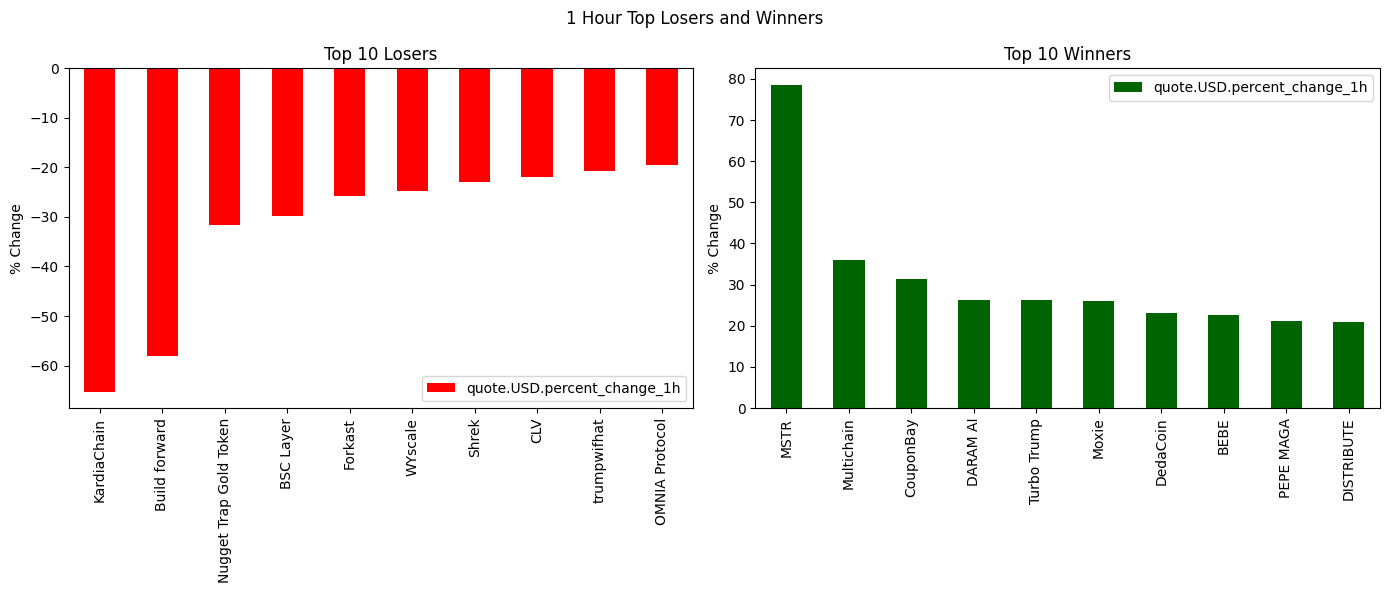

In [ ]:
# This is 1 hour top winners and losers based on USD percentage change

# Create the figure and axes for side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting the top 10 losers
top_10_losers = crypto_df.sort_values(by='quote.USD.percent_change_1h').head(10)
top_10_losers.plot.bar(x='name', y='quote.USD.percent_change_1h', color='red', ax=axes[0])

# Setting labels and title for the first subplot (top 10 losers)
axes[0].set_title("Top 10 Losers")
axes[0].set_ylabel("% Change")
axes[0].set_xlabel("")

# Plotting the top 10 winners
top_10_winners = crypto_df.sort_values(by='quote.USD.percent_change_1h', ascending=False).head(10)
top_10_winners.plot.bar(x='name', y='quote.USD.percent_change_1h', color='darkgreen', ax=axes[1])

# Setting labels and title for the second subplot (top 10 winners)
axes[1].set_title("Top 10 Winners")
axes[1].set_ylabel("% Change")
axes[1].set_xlabel("")

# Setting the main title of the figure
fig.suptitle("1 Hour Top Losers and Winners")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


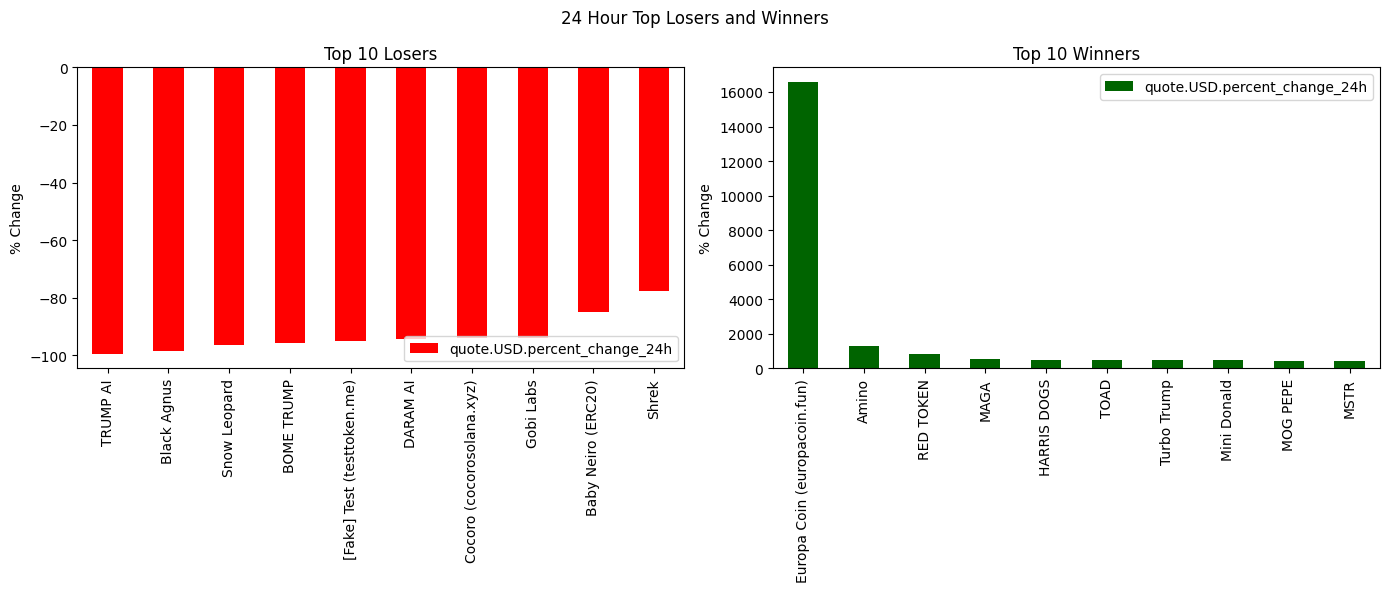

In [171]:
# Daily top losers and gainers based on percentage change


# Create the figure and axes for side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting the top 10 losers
top_10_losers = crypto_df.sort_values(by='quote.USD.percent_change_24h').head(10)
top_10_losers.plot.bar(x='name', y='quote.USD.percent_change_24h', color='red', ax=axes[0])

# Setting labels and title for the first subplot (top 10 losers)
axes[0].set_title("Top 10 Losers")
axes[0].set_ylabel("% Change")
axes[0].set_xlabel("")

# Plotting the top 10 winners
top_10_winners = crypto_df.sort_values(by='quote.USD.percent_change_24h', ascending=False).head(10)
top_10_winners.plot.bar(x='name', y='quote.USD.percent_change_24h', color='darkgreen', ax=axes[1])

# Setting labels and title for the second subplot (top 10 winners)
axes[1].set_title("Top 10 Winners")
axes[1].set_ylabel("% Change")
axes[1].set_xlabel("")

# Setting the main title of the figure
fig.suptitle("24 Hour Top Losers and Winners")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

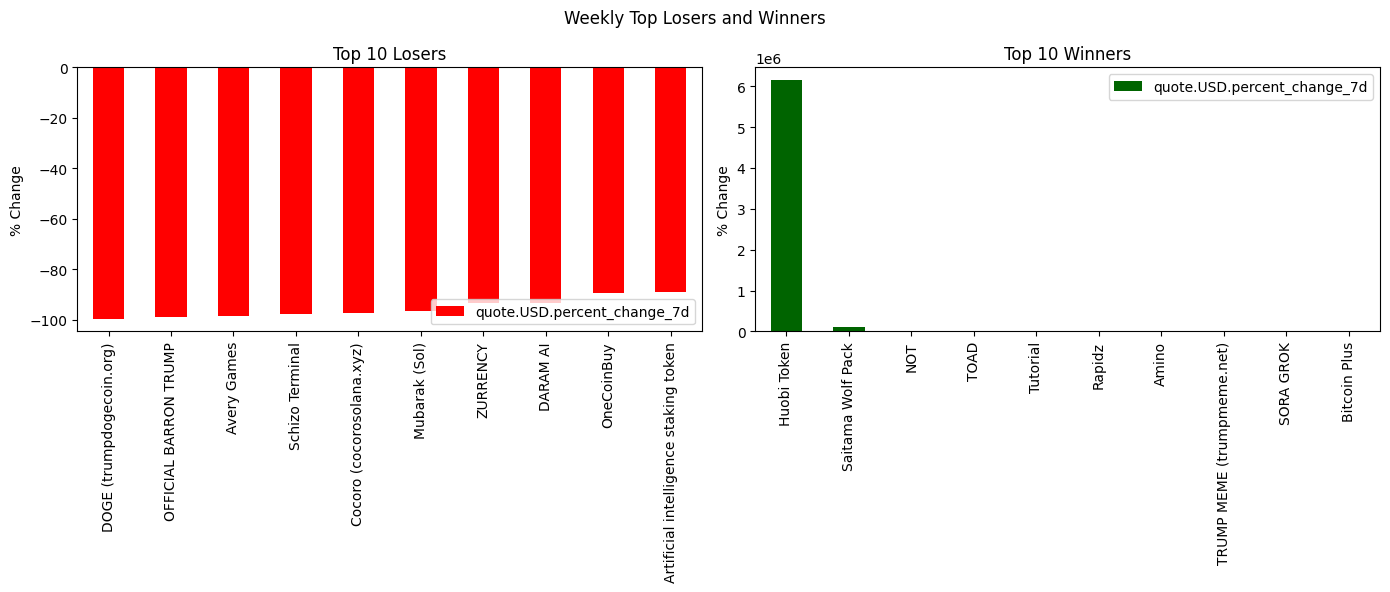

In [174]:
# Weekly top winners and losers based on USD % change

# Create the figure and axes for side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting the top 10 losers
top_10_losers = crypto_df.sort_values(by='quote.USD.percent_change_7d').head(10)
top_10_losers.plot.bar(x='name', y='quote.USD.percent_change_7d', color='red', ax=axes[0])

# Setting labels and title for the first subplot (top 10 losers)
axes[0].set_title("Top 10 Losers")
axes[0].set_ylabel("% Change")
axes[0].set_xlabel("")

# Plotting the top 10 winners
top_10_winners = crypto_df.sort_values(by='quote.USD.percent_change_7d', ascending=False).head(10)
top_10_winners.plot.bar(x='name', y='quote.USD.percent_change_7d', color='darkgreen', ax=axes[1])

# Setting labels and title for the second subplot (top 10 winners)
axes[1].set_title("Top 10 Winners")
axes[1].set_ylabel("% Change")
axes[1].set_xlabel("")

# Setting the main title of the figure
fig.suptitle("Weekly Top Losers and Winners")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='quote.USD.market_cap', ylabel='quote.USD.percent_change_7d'>

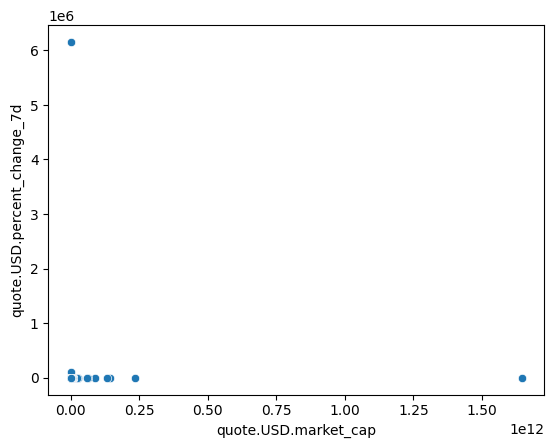

In [95]:
# Correlation between market cap and Price growth
# Checking whether market cap dominance affects price growth

sns.scatterplot(data=crypto_df, x="quote.USD.market_cap", y="quote.USD.percent_change_7d")

## Crypto Market Segmentation
- Market cap helps to compare the total value of one cryptocurrency with another so you can make more informed decisions when investing.  

Large-cap: cryptocurrencies, such as Bitcoin and Ethereum, have a market capitalization exceeding $10 billion. Investors generally view them as lower-risk assets due to their established growth history and higher liquidity.
They can handle a larger number of people cashing out without significantly affecting the price

Mid-cap: Cryptocurrencies with a market capitalization between $10 billion and $100 billion. They are considered moderately risk-averse assets due to their potential growth and liquidity.

Small-cap: Cryptocurrencies with a market capitalization below $10 billion. They are considered highly risk-averse assets due to their potential losses and lack of liquidity.
Are most susceptible to dramatic swings based on market sentiment




In [178]:
# Classification of coins as Large Cap > (10Bn), Mid Cap(between 1Bn-10Bn), Small Cap(<1B)
crypto_df['market_cap_class'] = pd.cut(
    crypto_df['quote.USD.market_cap'], 
    bins=[-np.inf, 1_000_000_000, 10_000_000_000, np.inf], 
    labels=['Small Cap', 'Mid Cap', 'Large Cap']
)

# Count the number of coins in each category
crypto_df['market_cap_class'].value_counts()


market_cap_class
Small Cap    4935
Mid Cap        55
Large Cap      10
Name: count, dtype: int64

In [179]:
conditions = [
    (crypto_df["quote.USD.market_cap"]>= 10e9),
    (crypto_df["quote.USD.market_cap"].between(1e9, 10e9)),
    (crypto_df["quote.USD.market_cap"]<1e9)
]

choices = ['Large Cap', 'Mid Cap', 'Small Cap']

crypto_df['market_cap_class'] = np.select(conditions, choices, default="Unknown")


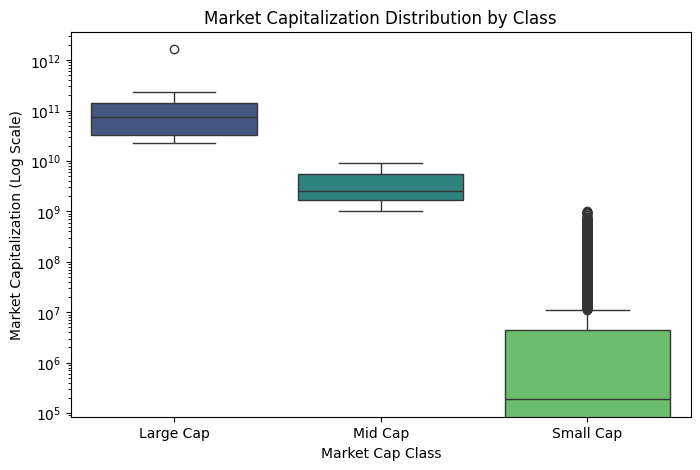

In [180]:
# Boxplot showing the distribution of market caps within each class

plt.figure(figsize=(8, 5))
sns.boxplot(x="market_cap_class", y="quote.USD.market_cap", data=crypto_df, palette="viridis")

plt.yscale("log")  # Log scale to handle large values
plt.xlabel("Market Cap Class")
plt.ylabel("Market Capitalization (Log Scale)")
plt.title("Market Capitalization Distribution by Class")
plt.show()


Large Cap:
Generally has the highest market capitalization values.
The interquartile range (IQR) is relatively small compared to the other classes.
There is an outlier above the box, indicating a company with an exceptionally high market capitalization.

Mid Cap:
Has lower market capitalization compared to Large Cap.
The IQR shows a relatively even distribution.
No extreme outliers are visible.

Small Cap:
Has the lowest market capitalization values.
The distribution is wider, with a larger range.
There are several outliers (black dots) above the box, indicating some companies with significantly higher market caps than the median.

Key Observations:
Market capitalization decreases from Large Cap to Small Cap.
Variability is highest in Small Cap stocks, as seen from the wide range.
Outliers indicate companies with exceptional market capitalizations within their categories.

In [184]:
# Setting id as the index parameter

# crypto_df = crypto_df.set_index("id")

crypto_df.head()

name symbol      slug  num_market_pairs  \
id                                                     
1         Bitcoin    BTC   bitcoin             11981   
1027     Ethereum    ETH  ethereum             10055   
825   Tether USDt   USDT    tether            120000   
52            XRP    XRP       xrp              1552   
1839          BNB    BNB       bnb              2391   

                    date_added  \
id                               
1    2010-07-13 00:00:00+00:00   
1027 2015-08-07 00:00:00+00:00   
825  2015-02-25 00:00:00+00:00   
52   2013-08-04 00:00:00+00:00   
1839 2017-07-25 00:00:00+00:00   

                                                   tags  circulating_supply  \
id                                                                            
1     ['mineable', 'pow', 'sha-256', 'store-of-value...        1.983883e+07   
1027  ['pos', 'smart-contracts', 'ethereum-ecosystem...        1.206267e+08   
825   ['stablecoin', 'asset-backed-stablecoin', 'wav...        1.434391e+11   
52    ['medium-of-exchange', 'enterprise-solutions',...        5.810892e+10   
1839  ['marketplace', 'centralized-exchange', 'payme...        1.424742e+08   

      total_supply  infinite_supply  cmc_rank              last_updated  \
id                                                                        
1     1.983883e+07            False         1 2025-03-19 04:59:00+00:00   
1027  1.206267e+08             True         2 2025-03-19 04:59:00+00:00   
825   1.448819e+11             True         3 2025-03-19 04:59:00+00:00   
52    9.998634e+10            False         4 2025-03-19 04:59:00+00:00   
1839  1.424742e+08            False         5 2025-03-19 04:59:00+00:00   

      quote.USD.price  quote.USD.volume_24h  quote.USD.volume_change_24h  \
id                                                                         
1        82957.086695          2.441122e+10                       1.6347   
1027      1932.947478          1.068146e+10                       8.9571   
825          0.999963          5.567227e+10                      -1.2211   
52           2.293016          3.181428e+09                      -9.2732   
1839       617.769418          2.103641e+09                     -10.9411   

      quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
id                                                                
1                       -0.116585                     -0.010259   
1027                    -0.279636                      1.564173   
825                      0.004874                      0.007858   
52                      -0.007921                      0.506187   
1839                    -0.155172                     -2.065155   

      quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
id                                                                
1                        1.476235                    -13.633174   
1027                     3.606353                    -27.404260   
825                      0.042786                     -0.021278   
52                       6.284276                    -15.211282   
1839                    12.776992                     -7.830544   

      quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
id                                                                 
1                       -19.882892                    -17.553957   
1027                    -42.545772                    -47.071319   
825                       0.029892                      0.047764   
52                      -28.392975                     -2.148903   
1839                    -12.510435                    -11.476351   

      quote.USD.market_cap  quote.USD.market_cap_dominance  \
id                                                           
1             1.645772e+12                         60.5729   
1027          2.331651e+11                          8.5817   
825           1.434337e+11                          5.2791   
52            1.332447e+11               

In [ ]:
# Names of cryptocurrencies within the Large Cap market classification
crypto_df[crypto_df["market_cap_class"] == "Large Cap"]["name"]

id
1           Bitcoin
1027       Ethereum
825     Tether USDt
52              XRP
1839            BNB
5426         Solana
3408           USDC
74         Dogecoin
2010        Cardano
1958           TRON
Name: name, dtype: object

In [199]:
# Names of cryptocurrencies within the Medium Cap market classification

crypto_df[crypto_df["market_cap_class"] == "Mid Cap"]["name"]

id
1975                                 Chainlink
3957                              UNUS SED LEO
11419                                  Toncoin
512                                    Stellar
5805                                 Avalanche
4642                                    Hedera
35697                                       Pi
5994                                 Shiba Inu
20947                                      Sui
6636                                  Polkadot
6536                                    MANTRA
2                                     Litecoin
1831                              Bitcoin Cash
11092                             Bitget Token
29470                              Ethena USDe
4943                                       Dai
32196                              Hyperliquid
328                                     Monero
7083                                   Uniswap
21794                                    Aptos
3897                                       OKB
6535      

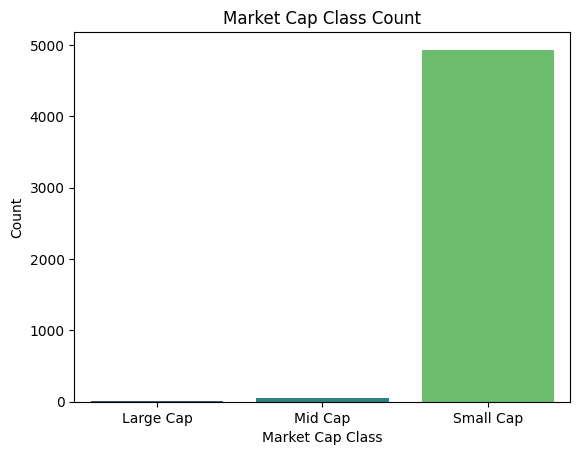

In [194]:
# Plot of market cap class with labels

sns.countplot(x="market_cap_class", data=crypto_df, palette="viridis")
plt.xlabel("Market Cap Class")
plt.ylabel("Count")
plt.title("Market Cap Class Count")
plt.show()

### Moving Average & Bollinger Bands - Determining trend and volatility

A Simple Moving Average (SMA), also known as a rolling or running average, is calculated by averaging the price of a security over a specific number of periods. Most moving averages use closing prices. For example, a 5-day SMA is the sum of the last five closing prices divided by five. As new data becomes available, older data is dropped, causing the average to shift along the time scale.

Bollinger Bands are a technical indicator used to assess a stock’s volatility and determine whether its price is relatively high or low. These bands consist of three lines:

The middle band is the SMA.
The upper band is typically two standard deviations above the SMA.
The lower band is typically two standard deviations below the SMA.
To calculate the SMA, we use the pandas.Series.rolling method, which creates rolling windows over the data.

In this analysis, we will use:

A 30-day window for the SMA to track Bitcoin’s price trends over the past month.
Two standard deviations for the Bollinger Bands to measure volatility.
Since CoinMarketCap does not provide historical data, we will use the CoinGecko API to fetch the required price data.

### CoinGecko API to fetch the required price data & historical data

In [210]:
# Importing modules
import datetime as dt
import time as t
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
from plotly.offline import plot


In [216]:
# Creating a client
cg = CoinGeckoAPI()

# confirming a connection
cg.ping()
# Getting a list of coins sort df by id
coin_list = cg.get_coins_list()
coinDataFrame = pd.DataFrame.from_dict(coin_list).sort_values("id").reset_index(drop=True)

coinDataFrame.head()

# btc
coinDataFrame[coinDataFrame["id"] == "bitcoin"]
# eth
coinDataFrame[coinDataFrame["id"] == "ethereum"]


id symbol      name
5343  ethereum    eth  Ethereum

### Bitcoin

In [ ]:
bit_price = cg.get_coin_market_chart_by_id("bitcoin","usd","30")
bit_time = [i[0] for i in bit_price['prices']]
bit_prices = [i[1] for i in bit_price['prices']]
bit_market_caps = [i[1] for i in bit_price['market_caps']]
bit_total_volume = [i[1] for i in bit_price['total_volumes']]

In [219]:
cg_df = pd.DataFrame({'time':bit_time,'price':bit_prices,'market_caps':bit_market_caps,'total_volumes':bit_total_volume})
cg_df['time'] = pd.to_datetime((cg_df['time']/1000),unit='s')

In [220]:
cg_df = cg_df.set_index('time')

In [222]:
cg_df['ma_rolling_30-Day'] = cg_df.price.rolling(window=30).mean()
cg_df['std'] = cg_df.price.rolling(window=30).std()
cg_df['upper'] = cg_df['ma_rolling_30-Day'] + 2*cg_df['std']
cg_df['lower'] = cg_df['ma_rolling_30-Day']- 2*cg_df['std']
cg_df.head(20)

price   market_caps  total_volumes  \
time                                                                       
2025-02-17 14:09:01.694000006  96469.903026  1.912032e+12   2.094163e+10   
2025-02-17 15:03:19.163000107  96825.391857  1.919379e+12   2.235514e+10   
2025-02-17 16:03:59.095999956  95601.771212  1.897768e+12   2.234124e+10   
2025-02-17 17:03:49.983000040  95367.308398  1.891838e+12   2.539624e+10   
2025-02-17 18:04:08.444000006  95473.922711  1.895539e+12   2.693276e+10   
2025-02-17 19:04:17.506000042  95305.814716  1.888828e+12   2.521015e+10   
2025-02-17 20:04:24.418999910  95517.336284  1.894264e+12   2.636903e+10   
2025-02-17 21:04:25.809999943  96001.225102  1.903298e+12   2.592257e+10   
2025-02-17 22:04:28.726000071  96394.200105  1.911098e+12   2.866857e+10   
2025-02-17 23:03:53.369999886  95910.634400  1.902326e+12   2.662055e+10   
2025-02-18 00:04:13.461999893  95784.629539  1.898605e+12   2.528917e+10   
2025-02-18 01:04:27.335000038  95657.124031  1.895483e+12   2.695319e+10   
2025-02-18 02:04:14.216000080  96283.172169  1.908491e+12   2.450824e+10   
2025-02-18 03:04:04.967000008  96049.471604  1.904046e+12   2.609661e+10   
2025-02-18 04:03:52.651999950  96188.684352  1.907104e+12   2.504546e+10   
2025-02-18 05:04:58.618999958  96057.167496  1.904246e+12   2.242974e+10   
2025-02-18 06:04:36.443000078  95607.025267  1.895957e+12   2.604013e+10   
2025-02-18 07:05:29.279999971  95364.767322  1.889242e+12   2.530086e+10   
2025-02-18 08:09:27.434000015  95318.637324  1.892746e+12   2.752636e+10   
2025-02-18 09:04:26.644000053  95189.252145  1.887033e+12   2.617743e+10   

                               ma_rolling_30-Day  std  upper  lower  
time                                                                 
2025-02-17 14:09:01.694000006                NaN  NaN    NaN    NaN  
2025-02-17 15:03:19.163000107                NaN  NaN    NaN    NaN  
2025-02-17 16:03:59.095999956                NaN  NaN    NaN    NaN  
2025-02-17 17:03:49.983000040                NaN  NaN    NaN    NaN  
2025-02-17 18:04:08.444000006                NaN  NaN    NaN    NaN  
2025-02-17 19:04:17.506000042                NaN  NaN    NaN    NaN  
2025-02-17 20:04:24.418999910                NaN  NaN    NaN    NaN  
2025-02-17 21:04:25.809999943                NaN  NaN    NaN    NaN  
2025-02-17 22:04:28.726000071                NaN  NaN    NaN    NaN  
2025-02-17 23:03:53.369999886                NaN  NaN    NaN    NaN  
2025-02-18 00:04:13.461999893                NaN  NaN    NaN    NaN  
2025-02-18 01:04:27.335000038                NaN  NaN    NaN    NaN  
2025-02-18 02:04:14.216000080                NaN  NaN    NaN    NaN  
2025-02-18 03:04:04.967000008                NaN  NaN    NaN    NaN  
2025-02-18 04:03:52.651999950                NaN  NaN    NaN    NaN  
2025-02-18 05:04:58.618999958                NaN  NaN    NaN    NaN  
2025-02-18 06:04:36.443000078                NaN  NaN    NaN    NaN  
2025-02-18 07:05:29.279999971                NaN  NaN    NaN    NaN  
2025-02-18 08:09:27.434000015                NaN  NaN    NaN    NaN  
2025-02-18 09:04:26.644000053                NaN  NaN    NaN    NaN

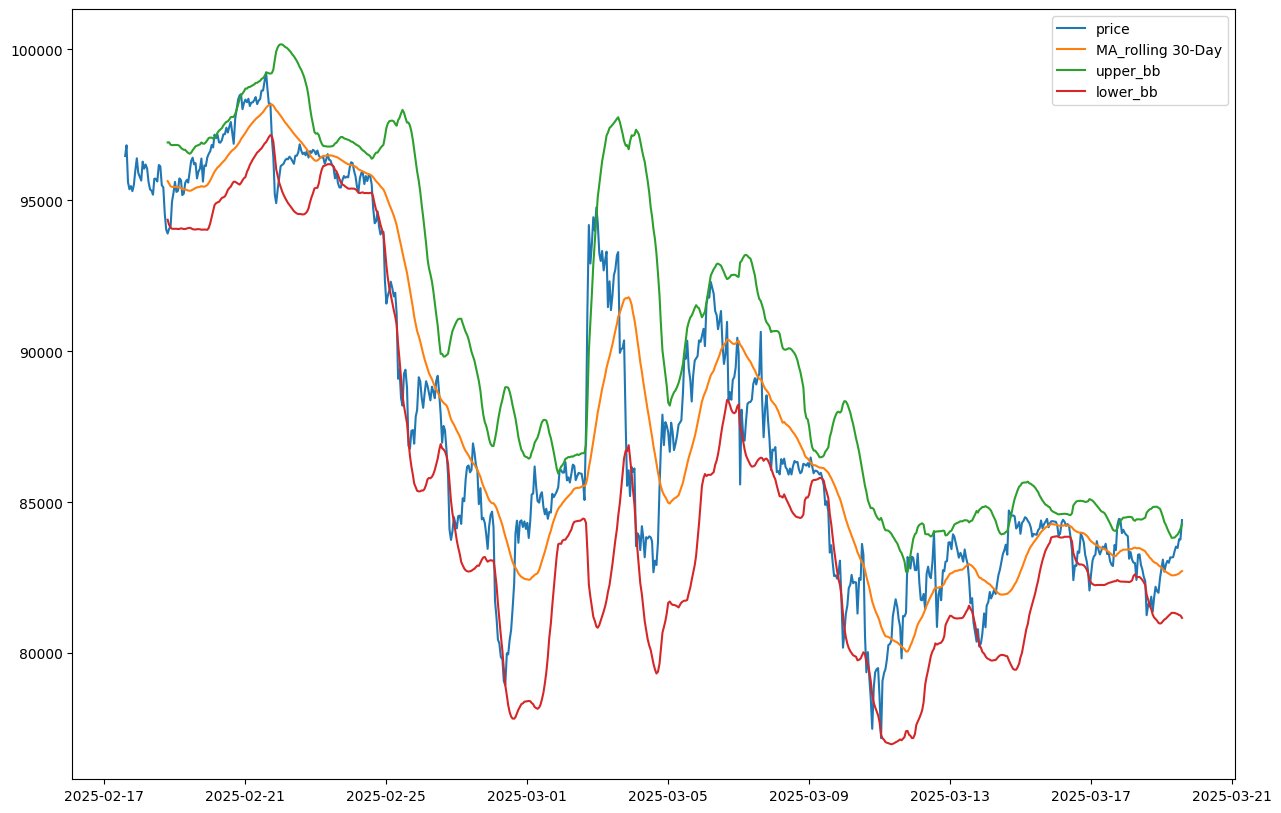

In [227]:
plt.figure(figsize=(15,10))

plt.plot(cg_df[['price','ma_rolling_30-Day','upper','lower']])
plt.legend(['price','MA_rolling 30-Day','upper_bb','lower_bb'])

In [ ]:
dates, market_caps = get_market_cap_history(crypto, days=14)


⚠️ No market cap data for binancecoin


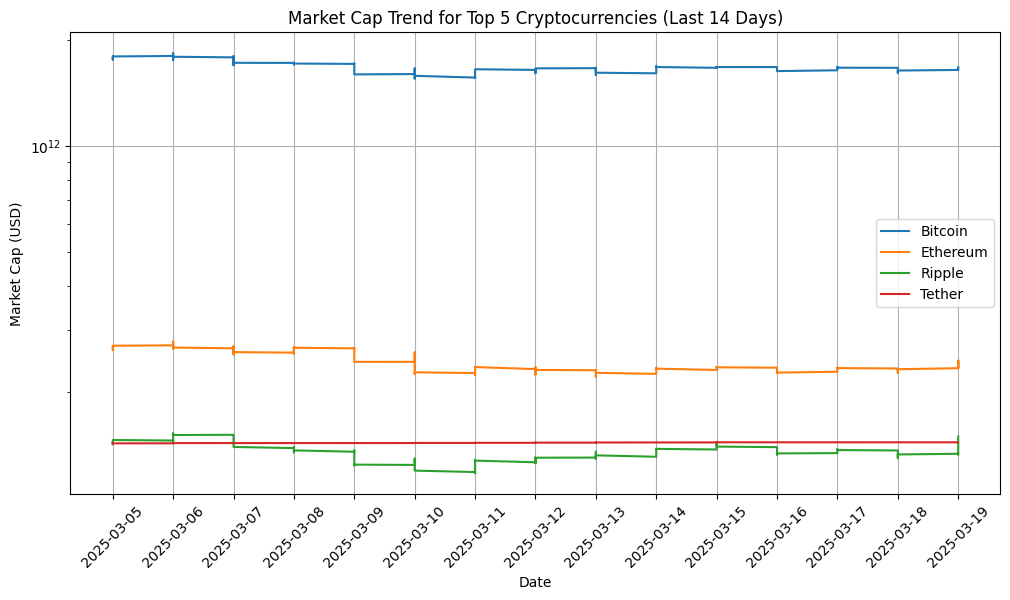

In [235]:
import requests
import time
import matplotlib.pyplot as plt

def get_top_5_cryptos():
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {"vs_currency": "usd", "order": "market_cap_desc", "per_page": 5, "page": 1}
    response = requests.get(url, params=params)
    return [coin["id"] for coin in response.json()]

def get_market_cap_history(crypto_id, days=14):
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart"
    params = {"vs_currency": "usd", "days": days}
    response = requests.get(url, params=params)
    
    data = response.json()
    market_cap_data = data.get("market_caps", [])
    
    if not market_cap_data:
        print(f"⚠️ No market cap data for {crypto_id}")
        return [], []

    timestamps = [time.strftime('%Y-%m-%d', time.gmtime(ts / 1000)) for ts, _ in market_cap_data]
    market_caps = [cap for _, cap in market_cap_data]
    
    return timestamps, market_caps

top_5_cryptos = get_top_5_cryptos()
plt.figure(figsize=(12, 6))

for crypto in top_5_cryptos:
    dates, market_caps = get_market_cap_history(crypto, days=14)
    if dates:
        plt.plot(dates, market_caps, label=crypto.capitalize())

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Market Cap (USD)")
plt.title("Market Cap Trend for Top 5 Cryptocurrencies (Last 14 Days)")
plt.legend()
plt.yscale("log")  # Log scale to handle large differences
plt.grid(True)
plt.show()


In [239]:
crypto_df.to_csv("crypto_data.csv", index=False)

In [241]:
cg_df.to_csv("cg_data.csv", index=False)